In [33]:
import pandas as pd

#Leitura
#Para responder se o lucro bruto dos postos está relacionado com 
Gini = pd.DataFrame(data={'REGIAO': ['NORTE', 'NORDESTE', 'SUDESTE', 'SUL', 'CENTRO OESTE'], 'INDICE DE GINI': [0.539, 0.555, 0.535, 0.473, 0.523]})
Lucro_Bruto = pd.read_csv(r'data\LucroBruto.csv', sep=';').drop(columns=['NUMERO DE POSTOS PESQUISADOS', 'DELTA', 'ESTADO'])



In [34]:
#Criando o DELTA como % de aumento 
Lucro_Bruto['DELTA'] = ((Lucro_Bruto['PRECO MEDIO REVENDA'] - Lucro_Bruto['PRECO MEDIO DISTRIBUICAO'])/Lucro_Bruto['PRECO MEDIO REVENDA'])*100
Lucro_Bruto

,DATA INICIAL,DATA FINAL,REGIAO,PRODUTO,PRECO MEDIO REVENDA,PRECO MEDIO DISTRIBUICAO,DELTA
0,2004-05-09,2004-05-15,CENTRO OESTE,ETANOL HIDRATADO,1.288,0.825,35.947205
1,2004-05-09,2004-05-15,CENTRO OESTE,ETANOL HIDRATADO,1.162,0.763,34.337349
2,2004-05-09,2004-05-15,CENTRO OESTE,ETANOL HIDRATADO,1.389,0.970,30.165587
3,2004-05-09,2004-05-15,CENTRO OESTE,ETANOL HIDRATADO,1.262,0.830,34.231379
4,2004-05-09,2004-05-15,NORDESTE,ETANOL HIDRATADO,1.181,0.941,20.321761
...,...,...,...,...,...,...,...
78888,2020-08-16,2020-08-22,NORTE,OLEO DIESEL S10,3.459,3.109,10.118531
78889,2020-08-16,2020-08-22,SUL,OLEO DIESEL S10,3.395,2.947,13.195876
78890,2020-08-16,2020-08-22,SUDESTE,OLEO DIESEL S10,3.386,2.973,12.197283
78891,2020-08-16,2020-08-22,NORDESTE,OLEO DIESEL S10,3.559,3.046,14.414161


In [35]:
#Ajustes, filtrando apenas 2016 e agrupando por regiões
Lucro_Bruto['DATA INICIAL'] = Lucro_Bruto['DATA INICIAL'].astype('datetime64[ns]')
Lucro_Bruto['DATA FINAL'] = Lucro_Bruto['DATA FINAL'].astype('datetime64[ns]')
Lucro_Bruto = Lucro_Bruto.loc[(Lucro_Bruto['DATA INICIAL']>='2016-01-01') & (Lucro_Bruto['DATA FINAL']<='2016-12-31')]
Lucro_Bruto = Lucro_Bruto.drop(columns=['DATA INICIAL', 'DATA FINAL', 'PRECO MEDIO REVENDA', 'PRECO MEDIO DISTRIBUICAO', 'PRODUTO'])
Lucro_Bruto = Lucro_Bruto.groupby(['REGIAO']).mean()
Lucro_Bruto
#Agora temos o percentual de aumento por região, em 2016

,DELTA
REGIAO,
CENTRO OESTE,12.129047
NORDESTE,11.464494
NORTE,12.470446
SUDESTE,11.896675
SUL,12.175533


In [53]:
df = pd.merge(Lucro_Bruto, Gini, on=['REGIAO'], how='left')
df.sort_values(by=['DELTA'], ascending=False)

,REGIAO,DELTA,INDICE DE GINI
2,NORTE,12.470446,0.539
4,SUL,12.175533,0.473
0,CENTRO OESTE,12.129047,0.523
3,SUDESTE,11.896675,0.535
1,NORDESTE,11.464494,0.555


,DELTA,INDICE DE GINI
REGIAO,,
NORTE,12.470446,0.539
SUL,12.175533,0.473
CENTRO OESTE,12.129047,0.523
SUDESTE,11.896675,0.535
NORDESTE,11.464494,0.555


No handles with labels found to put in legend.


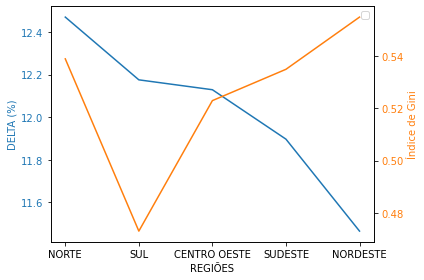

In [54]:
import matplotlib.pyplot as plt

df = df.set_index(['REGIAO']).sort_values(by=['DELTA'], ascending=False)
display(df)

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('REGIÕES')
ax1.set_ylabel('LUCRO BRUTO (%)', color=color)
ax1.plot(df['DELTA'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Índice de Gini', color=color) 
ax2.plot(df['INDICE DE GINI'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.legend()
plt.show()

,DELTA,INDICE DE GINI
REGIAO,,
NORDESTE,11.464494,0.555
NORTE,12.470446,0.539
SUDESTE,11.896675,0.535
CENTRO OESTE,12.129047,0.523
SUL,12.175533,0.473


No handles with labels found to put in legend.


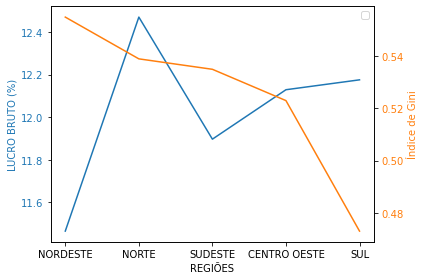

In [56]:
import matplotlib.pyplot as plt

df = df.sort_values(by=['INDICE DE GINI'], ascending=False)
display(df)

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('REGIÕES')
ax1.set_ylabel('LUCRO BRUTO (%)', color=color)
ax1.plot(df['DELTA'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Índice de Gini', color=color) 
ax2.plot(df['INDICE DE GINI'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.legend()
plt.show()

##### Referências
Fonte dos dados do Índice de Gini:
    (IBGE 2016)
    https://agenciadenoticias.ibge.gov.br/media/com_mediaibge/arquivos/bd466f98f27dac67181148ebe5d960de.pdf